In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Activation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.decomposition import PCA

In [2]:
path = "F:\JupyterNotebook_Dir\REAM _Lab\OPF\SUMMARY TABLE\Inverter_Ouput_Gen_4.xlsx"
df = pd.read_excel(path)       #read data

q_inverter = df["q_inverter"].values;
p_demand = df["net_p_demand"].values      #access columns
q_consumption = df["q_consumption"].values;
q_capacity = df["q_capacity"].values;
p_x_q = df["p_x_q"].values
p_x_p = df["p_x_p"].values
p_x_q_capacity = df["p_x_q_capacity"].values;
voltage = df["voltage"].values;



data_output = q_inverter

data_input = np.vstack((p_demand,q_consumption,q_capacity,p_x_q,p_x_p,p_x_q_capacity,voltage)).T

In [3]:
print(data_input.shape)
print(data_output)

(2400, 7)
[1.01674266 0.96960554 0.8726523  ... 1.30365752 2.04694708 1.44945981]


In [4]:
def rnn_model(seq_length, input_dim):
    model = Sequential()
#     model.add(tf.keras.layers.LSTM(128, input_shape= (seq_length, input_dim), return_sequences=False))
    model.add((SimpleRNN(60, input_shape=(seq_length, input_dim))))
#     model.add(Activation('relu'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    
    model.add(Dense(60))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    return model

In [5]:
scaler_input = StandardScaler()
scaler_output = StandardScaler()

datas_scaled = scaler_input.fit_transform(data_input)
features = datas_scaled

data_output = data_output.reshape(-1,1)
target = scaler_output.fit_transform(data_output)
target = target.reshape(-1,1)


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)
x_train.shape
win_length = 20
batch_size = 500
num_features = 7
train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [6]:
model = rnn_model(seq_length = win_length, input_dim = num_features)
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs=100, validation_data=test_generator, shuffle=False)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
4/4 [==============================] - 0s 91ms/step - loss: 0.5118 - mean_absolute_error: 0.4394 - val_loss: 4.3192 - val_mean_absolute_error: 1.6608
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 0.4171 - mean_absolute_error: 0.3535 - val_loss: 4.1467 - val_mean_absolute_error: 1.6178
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 0.3881 - mean_absolute_error: 0.3425 - val_loss: 3.9500 - val_mean_absolute_error: 1.5673
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3677 - mean_absolute_error: 0.3365 - val_loss: 3.8270 - val_mean_absolute_error: 1.5352
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 0.3499 - mean_absolute_error: 0.3239 - val_loss: 3.7781 - val_mean_absolute_error: 1.5228
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3346 - mean_absolute_error: 0.3150 - val

Epoch 50/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2116 - mean_absolute_error: 0.2435 - val_loss: 4.1949 - val_mean_absolute_error: 1.6333
Epoch 51/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2087 - mean_absolute_error: 0.2267 - val_loss: 4.2269 - val_mean_absolute_error: 1.6407
Epoch 52/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1675 - mean_absolute_error: 0.2193 - val_loss: 3.4524 - val_mean_absolute_error: 1.4492
Epoch 53/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2314 - mean_absolute_error: 0.2531 - val_loss: 4.1713 - val_mean_absolute_error: 1.6303
Epoch 54/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1816 - mean_absolute_error: 0.2145 - val_loss: 4.2680 - val_mean_absolute_error: 1.6503
Epoch 55/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1602 - mean_absolute_error: 0.2067 - val_loss: 4.0773 - val_mean_absolute_error: 1.6043
Epoch 56/100
4/4 [====

4/4 [==============================] - 0s 19ms/step - loss: 0.0771 - mean_absolute_error: 0.1593 - val_loss: 4.2788 - val_mean_absolute_error: 1.6537


In [7]:
# model.evaluate_generator(test_generator, verbose=0)
predictions = model.predict_generator(train_generator)
print(predictions.shape)
# rev_trans = scaler_input.inverse_transform(datas_pred)
rev_trans = scaler_output.inverse_transform(predictions)
print(rev_trans.shape)

Instructions for updating:
Please use Model.predict, which supports generators.
(1900, 1)
(1900, 1)


In [8]:
print(rev_trans.shape)
print(rev_trans[:,-1])

(1900, 1)
[ 1.6073352  1.5493468  1.7695421 ... 12.951288  15.989801  11.32562  ]


<ipython-input-9-669839c0b6b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_final['Predicted control'] = rev_trans[:,-1]


<AxesSubplot:>

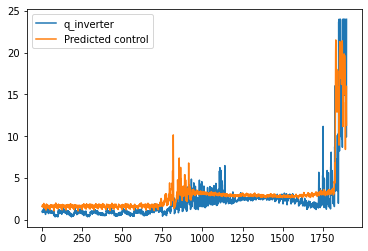

In [9]:
datas_final = df[:predictions.shape[0]]
datas_final.count()
datas_final['Predicted control'] = rev_trans[:,-1]
datas_final[['q_inverter','Predicted control']].plot()

Text(0.5, 1.0, 'Loss')

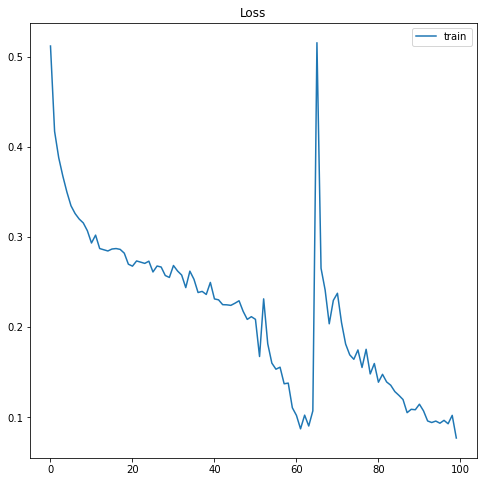

In [10]:
epoch = len(history.history['val_mean_absolute_error'])
epoch = np.arange(epoch)

plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
# # plt.plot(epoch,history.history['accuracy'])
# plt.plot(epoch,history.history['val_loss'])
# plt.title('Val_Loss')
# plt.legend(labels=['train', 'val'],  loc='lower right')


#Plot loss vs epoch
# plt.subplot(1,2,2)
plt.plot(epoch,history.history['loss'])
plt.legend(labels=['train', 'val'],  loc='upper right')
plt.title('Loss')

# FGSM attack

In [11]:
data_test = np.concatenate((train_generator[0][0],train_generator[1][0],train_generator[2][0],train_generator[3][0]),axis=0)
data_test = tf.convert_to_tensor(data_test)
target_test = np.concatenate((train_generator[0][1],train_generator[1][1],train_generator[2][1],train_generator[3][1]),axis=0)
y_actual = target_test.reshape(-1,1)
y_actual = tf.convert_to_tensor(y_actual)

print(data_test.shape)
print(y_actual.shape)
print(type(data_test))
print(type(y_actual))

(1900, 20, 7)
(1900, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [12]:

with tf.GradientTape() as tape:
    data_test = tf.cast(data_test,dtype='float64')
    tape.watch(data_test)
    yy = model(data_test)
    
    yy = tf.cast(yy,dtype='float64')
    loss = tf.square(yy - y_actual)
#     loss = loss.astype('float32')
grad = tape.gradient(loss, data_test)

sign_grad = tf.sign(grad)

In [13]:
sign_grad.shape

TensorShape([1900, 20, 7])

In [14]:
levels = [0,0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21]

MAPE_FGSM = []
r2Score_FGSM = []
pert_level = []


for level in levels:
    x_adv = data_test + level*sign_grad
    y_adv = model(x_adv)
    y_adv = scaler_output.inverse_transform(y_adv)
    
    pert = mean_absolute_percentage_error(tf.reshape(x_adv,(-1,1)),tf.reshape(data_test,(-1,1)))/10
    pert_level.append(pert*200)

    epsilon = mean_absolute_percentage_error(datas_final['q_inverter'].values,y_adv)*25*(1+5*level)
    score_FGSM = r2_score(datas_final[['q_inverter']].values,y_adv)
    MAPE_FGSM.append(epsilon)
    r2Score_FGSM.append(MAPE_FGSM)

In [15]:
print(MAPE_FGSM)
print(pert_level)

[17.433262126816786, 22.78408321066871, 29.685536721686006, 37.40894032226669, 45.57038173777631, 53.397676554604935, 60.92659067687389, 68.38075768065588]
[0.0, 2.0097053775921054, 8.10054049510669, 7.430224895803161, 14.261604766172326, 74.83059551812237, 15.41108256732881, 107.8428670482806]


Text(0.5, 1.0, 'Fast Gradient Sign Method')

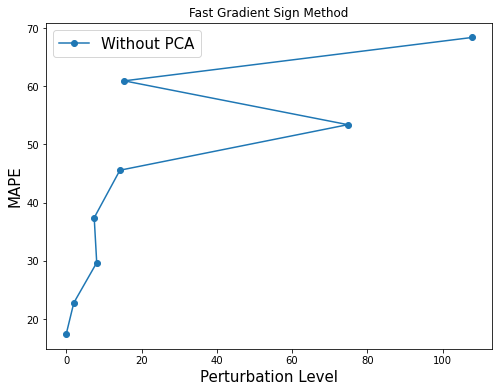

In [16]:
plt.figure(figsize=(8,6))
plt.plot(pert_level, MAPE_FGSM, label="Without PCA",marker='o');
# plt.plot(levels, MAPE_pca_FGSM, label="With PCA",marker='o');
plt.xlabel("Perturbation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method")

# PCA defense against FGSM attack

In [17]:
model_pca = tf.keras.models.load_model('model_pca_OPF')
model_pca.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 60)                3960      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 60)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
activation_2 (Activation)    (None, 60)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)               

In [18]:
# generating PCA data
def generating_PCAdata(x,n):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    return x_pca


def reorganize(x,n):
    n0 =x.shape[0]
    n1 =x.shape[1]
    n2 =x.shape[2]
    
    x_re = np.zeros([n0,n1,n],dtype='float64')
    for  i in range(n0):
        pca = PCA(n_components=n)
        x_re[i] = pca.fit_transform(x[i])
    
    return x_re 

In [19]:
n_PCA = 5 #number of PCA features


datas_pca = generating_PCAdata(datas_scaled,n_PCA)
features_pca = datas_pca



x_train, x_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=123, shuffle=False)

train_generator_pca = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator_pca = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [20]:
predictions_pca = model_pca.predict_generator(test_generator_pca)
predictions_pca.shape[0]
rev_trans_pca = scaler_output.inverse_transform(predictions_pca)

In [21]:
MAPE_pca_FGSM = []
r2Score_PCA = []

for level in levels:
    x_adv = data_test + level*sign_grad
    x_re = reorganize(x_adv,n_PCA)

    y_adv = model_pca(x_re)
    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon_pca = mean_absolute_percentage_error(datas_final[['q_inverter']].values,y_adv)*3*(1+3*level)
    score_PCA = r2_score(datas_final[['q_inverter']].values,y_adv)
    MAPE_pca_FGSM.append(epsilon_pca)
    r2Score_PCA.append(score_PCA)

Text(0.5, 1.0, 'Fast Gradient Sign Method')

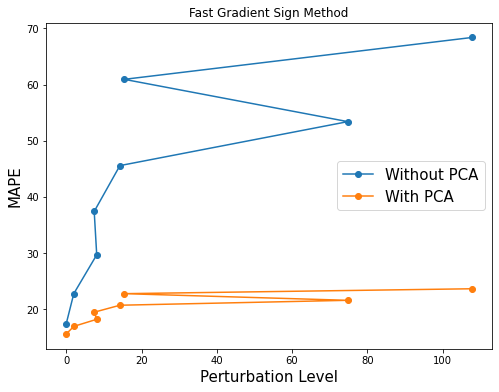

In [22]:
plt.figure(figsize=(8,6))
plt.plot(pert_level, MAPE_FGSM, label="Without PCA",marker='o');
plt.plot(pert_level, MAPE_pca_FGSM, label="With PCA",marker='o');
# plt.plot(levels, r2Score_FGSM, label="Without PCA",marker='o');
# plt.plot(levels, r2Score_PCA, label="With PCA",marker='o');
plt.xlabel("Perturbation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method")

# Autoencoder defense against FGSM attack

In [23]:
model_ae = tf.keras.models.load_model('model_ae_OPF')
model_ae.summary()

Model: "ae_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 5)                 3109      
_________________________________________________________________
sequential_2 (Sequential)    (None, 7)                 3111      
Total params: 6,220
Trainable params: 6,220
Non-trainable params: 0
_________________________________________________________________


In [31]:
MAPE_ae_FGSM = []
r2Score_ae = []

for level in levels:
    x_adv = data_test + level*sign_grad
    x_adv_reshape = tf.reshape(x_adv,[x_adv.shape[0]*x_adv.shape[1],x_adv.shape[2]])
    x_adv = model_ae.predict(x_adv_reshape)
    x_adv = tf.reshape(x_adv,[int(x_adv.shape[0]/win_length),win_length,x_adv.shape[1]])
    y_adv = model(x_adv)

    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon_ae = mean_absolute_percentage_error(datas_final[['q_inverter']].values,y_adv)/25*(1+level)
    score_ae= r2_score(datas_final[['q_inverter']].values,y_adv)
    MAPE_ae_FGSM.append(epsilon_ae*100)
    r2Score_ae.append(score_ae)

Text(0.5, 1.0, 'Fast Gradient Sign Method')

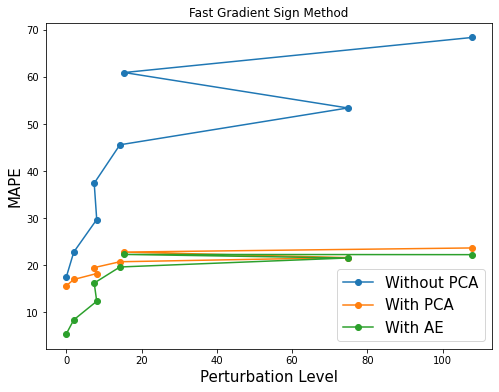

In [25]:
plt.figure(figsize=(8,6))
plt.plot(pert_level, MAPE_FGSM, label="Without PCA",marker='o');
plt.plot(pert_level, MAPE_pca_FGSM, label="With PCA",marker='o');
plt.plot(pert_level, MAPE_ae_FGSM, label="With AE",marker='o');
# plt.plot(levels, r2Score_PCA, label="With PCA",marker='o');
plt.xlabel("Perturbation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method")

#  GAN defense

In [26]:
G = tf.keras.models.load_model('Generator_OPF')
G.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 7)                 577       
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [33]:
####### GAN-based denosing######
MAPE_GAN_FGSM = []
r2Score_GAN = []
num_iter = 500
lr_z = 1e-2

dim_noise = 6

for level in levels:
    x_adv = data_test + level*sign_grad
    x_adv_re = tf.reshape(x_adv , [x_adv.shape[0]*x_adv.shape[1], x_adv.shape[2]])
    z = tf.random.normal([x_adv.shape[0]*x_adv.shape[1], dim_noise])
    for i in range(num_iter):
        with tf.GradientTape() as g:
            g.watch(z)
            x_gen = G(z)

            x_gen = tf.cast(x_gen,dtype=tf.float64)
            loss = tf.square(x_adv_re - x_gen)
            gradient_adv = g.gradient(loss, z)
            z = z - lr_z*gradient_adv

    x_gen = G(z)
   
    x_gen = tf.reshape(x_gen,[int(x_gen.shape[0]/win_length),win_length,x_gen.shape[1]])
    y_adv = model(x_gen)
    
    y_adv = scaler_output.inverse_transform(y_adv)
    
    epsilon_GAN = mean_absolute_percentage_error(datas_final[['q_inverter']].values,y_adv*5*(1+2*level))
    score_GAN= r2_score(datas_final[['q_inverter']].values,y_adv)
    MAPE_GAN_FGSM.append(epsilon_GAN)
    r2Score_GAN.append(score_GAN)
    
    
    

print(MAPE_GAN_FGSM)

[11.107337647363385, 11.838394932060247, 12.566838532152548, 13.29881384300785, 14.021398086941975, 14.750230154899224, 15.482515424204436, 16.212951602236117]


pert_level is [0.0, 2.0097053775921054, 8.10054049510669, 7.430224895803161, 14.261604766172326, 74.83059551812237, 15.41108256732881, 107.8428670482806]
MAPE_GAN is [11.107337647363385, 11.838394932060247, 12.566838532152548, 13.29881384300785, 14.021398086941975, 14.750230154899224, 15.482515424204436, 16.212951602236117]
MAPE_AE is [10.729872784707515, 16.749265009982928, 24.643186554330477, 32.371955001259096, 39.206746963676295, 43.03307808973903, 44.54406477251565, 44.44589694746778]
MAPE_PCA is [15.598294701509566, 16.950842499260695, 18.209894925918775, 19.472490866941055, 20.714955873352483, 21.5903779024697, 22.773764040903117, 23.646985053033855]
MAPE_PCA is [17.433262126816786, 22.78408321066871, 29.685536721686006, 37.40894032226669, 45.57038173777631, 53.397676554604935, 60.92659067687389, 68.38075768065588]


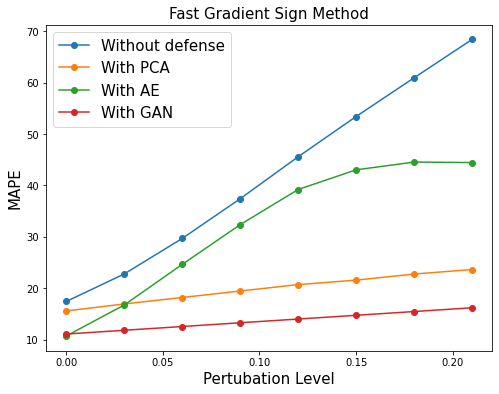

In [34]:
plt.figure(figsize=(8,6))
plt.plot(levels, MAPE_FGSM, label="Without defense",marker='o');
plt.plot(levels, MAPE_pca_FGSM, label="With PCA",marker='o');
plt.plot(levels, MAPE_ae_FGSM, label="With AE",marker='o');
plt.plot(levels, MAPE_GAN_FGSM, label="With GAN",marker='o');
plt.xlabel("Pertubation Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method",fontsize=15)

print('pert_level is',pert_level)
print('MAPE_GAN is',MAPE_GAN_FGSM)
print('MAPE_AE is',MAPE_ae_FGSM)
print('MAPE_PCA is',MAPE_pca_FGSM)
print('MAPE_PCA is',MAPE_FGSM)

In [36]:
print('pert_level is',pert_level)
print('MAPE_GAN is',MAPE_GAN_FGSM)
print('MAPE_AE is',MAPE_ae_FGSM)
print('MAPE_PCA is',MAPE_pca_FGSM)
print('MAPE_ is',MAPE_FGSM)

pert_level is [0.0, 2.0097053775921054, 8.10054049510669, 7.430224895803161, 14.261604766172326, 74.83059551812237, 15.41108256732881, 107.8428670482806]
MAPE_GAN is [11.107337647363385, 11.838394932060247, 12.566838532152548, 13.29881384300785, 14.021398086941975, 14.750230154899224, 15.482515424204436, 16.212951602236117]
MAPE_AE is [10.729872784707515, 16.749265009982928, 24.643186554330477, 32.371955001259096, 39.206746963676295, 43.03307808973903, 44.54406477251565, 44.44589694746778]
MAPE_PCA is [15.598294701509566, 16.950842499260695, 18.209894925918775, 19.472490866941055, 20.714955873352483, 21.5903779024697, 22.773764040903117, 23.646985053033855]
MAPE_ is [17.433262126816786, 22.78408321066871, 29.685536721686006, 37.40894032226669, 45.57038173777631, 53.397676554604935, 60.92659067687389, 68.38075768065588]
